In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [74]:
air = pd.read_excel("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Clustering/EastWestAirlines.xlsx","data")

In [36]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [37]:
air.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [75]:
air = air.drop(['ID#'],axis=1)
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [40]:
from sklearn import preprocessing
normalize = preprocessing.normalize(air)

In [42]:
normalize

array([[9.70414393e-01, 0.00000000e+00, 3.44815547e-05, ...,
        0.00000000e+00, 2.41370883e-01, 0.00000000e+00],
       [9.40208573e-01, 0.00000000e+00, 4.88572320e-05, ...,
        0.00000000e+00, 3.40437193e-01, 0.00000000e+00],
       [9.81113099e-01, 0.00000000e+00, 2.37247449e-05, ...,
        0.00000000e+00, 1.66879855e-01, 0.00000000e+00],
       ...,
       [9.44947533e-01, 0.00000000e+00, 3.85184532e-05, ...,
        0.00000000e+00, 1.80009571e-02, 1.28394844e-05],
       [9.99591676e-01, 0.00000000e+00, 1.82078303e-05, ...,
        1.82078303e-05, 2.55091703e-02, 0.00000000e+00],
       [9.07271293e-01, 0.00000000e+00, 3.00819394e-04, ...,
        0.00000000e+00, 4.20545513e-01, 0.00000000e+00]])

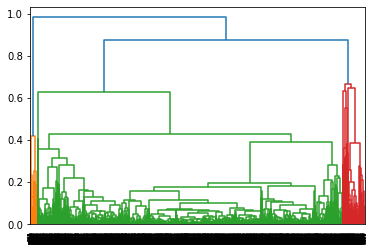

In [78]:
dendrogram = sch.dendrogram(sch.linkage(normalize, method='average'))

In [66]:
hc = AgglomerativeClustering(n_clusters=6,affinity= 'euclidean', linkage = 'single')

In [67]:
y_hc = hc.fit_predict(normalize)
Clusters = pd.DataFrame(y_hc,columns=['Clusters'])

In [70]:
air['ClustersID'] = Clusters

In [71]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters-=_ID,ClustersID
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0
